<a href="https://colab.research.google.com/github/Jadeilson08/tcc-data-science/blob/master/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas:

## 1. coleta de dados
- [x] Obtenha os dados de preço histórico de Bitcoin e Ethereum em um formato de tabela (por exemplo, CSV).
- [x] Obtenha os dados do valor do dolar por dia

## 2. processar e tratar dados
- [x] Utilize a biblioteca Pandas para carregar e manipular os dados.

## 3. analisar e explorar dados
- [x] Utilize a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
- [x] Unir DF's
- [ ] Utilize a biblioteca de aprendizado de máquina scikit-learn para dividir os dados em conjuntos de treinamento e teste.
- [ ] Escolha um modelo de aprendizado de máquina apropriado para séries temporais (por exemplo, ARIMA, SARIMA, Prophet) e treine-o com os dados de treinamento.
- [ ] Faça previsões com o modelo treinado utilizando os dados de teste e avaliar a precisão do modelo.
- [ ] Utilize o modelo treinado para fazer previsões futuras.

In [1]:
# importando o data_reader
!pip install -q yfinance
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go

yfin.pdr_override()

In [2]:
# criptomoedas analisadas: Bitcoin(BTC-USD), Ethereum(ETH-USD), Tether(USDT-USD), BNB(BNB)

#data inicial e final
start_date = '2019-08-01'
end_date = '2021-07-30'

# coletando os dataframe
df_bitcoin = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)
df_ethereum = pdr.get_data_yahoo('ETH-USD', start=start_date, end=end_date)
df_tether = pdr.get_data_yahoo('USDT-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# o index de todos os dataframe ja sao as datas, sem necessidade de atualizar o indice
df_bitcoin.info()
#df_ethereum.info()
#df_tether.info()
''' etapa 1 realizada '''

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2019-08-01 to 2021-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       729 non-null    float64
 1   High       729 non-null    float64
 2   Low        729 non-null    float64
 3   Close      729 non-null    float64
 4   Adj Close  729 non-null    float64
 5   Volume     729 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.9 KB


' etapa 1 realizada '

In [4]:
#verificando se tem algum valor nan ou null
df_bitcoin.head()
# df_bitcoin.isna().any()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,10077.442383,10446.919922,9922.019531,10399.668945,10399.668945,17165337858
2019-08-02,10402.042969,10657.953125,10371.013672,10518.174805,10518.174805,17489094082
2019-08-03,10519.278320,10946.781250,10503.504883,10821.726562,10821.726562,15352685061
2019-08-04,10821.632812,11009.207031,10620.278320,10970.184570,10970.184570,16530894787
2019-08-05,10960.735352,11895.091797,10960.735352,11805.653320,11805.653320,23875988832


In [5]:
''' 
  etapa 2
  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv
  no seguinte endereco
  https://br.investing.com/currencies/usd-brl-historical-data

'''

' \n  etapa 2\n  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv\n  no seguinte endereco\n  https://br.investing.com/currencies/usd-brl-historical-data\n\n'

In [6]:
df_dolar = pd.read_csv('https://raw.githubusercontent.com/Jadeilson08/tcc-data-science/master/USD_BRL_20190801_20210730.csv')

#precisa mudar o index para a colula Data
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      522 non-null    object
 1   Último    522 non-null    object
 2   Abertura  522 non-null    object
 3   Máxima    522 non-null    object
 4   Mínima    522 non-null    object
 5   Vol.      505 non-null    object
 6   Var%      522 non-null    object
dtypes: object(7)
memory usage: 28.7+ KB


In [7]:
#renomeando colunas para ingles
df_dolar = df_dolar.rename(columns={'Data': 'Date','Último': 'dolar_close', 'Abertura': 'dolar_open', 'Máxima': 'dolar_high', 'Mínima': 'dolar_low', 'Vol.' : 'dolar_volume', 'Var%': 'dolar_variation'})

#convertando BR para US
columns = ['dolar_close', 'dolar_open', 'dolar_high', 'dolar_low']

for column in columns:
  df_dolar[column] = df_dolar[column].apply(lambda x: x.replace(',', '.')).astype(np.float64)

df_dolar['Date'] = pd.to_datetime(df_dolar['Date'], format='%d.%m.%Y')

#alterando o index para Data
df_dolar = df_dolar.set_index('Date')

df_dolar.sort_values('Date')

,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Date,,,,,,
2019-08-01,3.8403,3.8165,3.8618,3.8115,"77,21K","0,72%"
2019-08-02,3.8893,3.8411,3.8937,3.8397,"68,81K","1,28%"
2019-08-05,3.9783,3.8859,3.9786,3.8859,"75,39K","2,29%"
2019-08-06,3.9612,3.9758,3.9866,3.9356,"71,00K","-0,43%"
2019-08-07,3.9691,3.9619,3.9931,3.9448,"75,52K","0,20%"
...,...,...,...,...,...,...
2021-07-26,5.1761,5.2051,5.2304,5.1516,"68,85K","-0,47%"
2021-07-27,5.1690,5.1769,5.2061,5.1486,"92,09K","-0,14%"
2021-07-28,5.1157,5.1710,5.1926,5.1040,"112,11K","-1,03%"


In [8]:
# visualizando dados vazios 
print(df_dolar.isna().any())
print(df_dolar.isna().sum())
df_dolar['dolar_volume'].head()

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume        True
dolar_variation    False
dtype: bool
dolar_close         0
dolar_open          0
dolar_high          0
dolar_low           0
dolar_volume       17
dolar_variation     0
dtype: int64


Date
2021-07-30     89,74K
2021-07-29     92,46K
2021-07-28    112,11K
2021-07-27     92,09K
2021-07-26     68,85K
Name: dolar_volume, dtype: object

In [9]:
#funcao para remover k 
def remove_k(numero_k):
  return float(numero_k.replace(',', '.').replace('K', '').replace('k',''))

#funcao para add k
def add_k(numero):
  return f"{str(numero).replace('.', ',')}K"

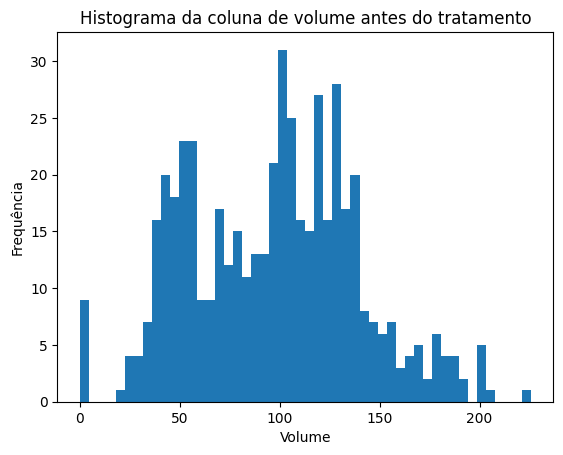

In [10]:
#plotando hist para analise de dados
dolar_volume = df_dolar['dolar_volume'].dropna().apply(remove_k)
plt.hist(dolar_volume, bins=50)
plt.title('Histograma da coluna de volume antes do tratamento')
plt.xlabel('Volume')
plt.ylabel('Frequência')
plt.show()

In [11]:
dolar_volume = dolar_volume.sort_values()

# Imprimindo as medidas estatísticas
print(dolar_volume.describe())

count    505.000000
mean      96.975327
std       42.635833
min        0.000000
25%       60.090000
50%      100.200000
75%      126.860000
max      225.650000
Name: dolar_volume, dtype: float64


In [12]:
# como ha valores muitos extremos (225.65~0) e a media e mediana sao valores proximos
# sera adotado a mediana como valor para efetuar preencher as linhas faltantes
# da coluna df_dolar['dolar_volume']

median_k = add_k(dolar_volume.median())

df_dolar['dolar_volume'].fillna(median_k, inplace=True)

print(df_dolar.isna().any())

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume       False
dolar_variation    False
dtype: bool


In [13]:
'''fim etapa 2 '''

'fim etapa 2 '

In [14]:
'''
  etapa 4:

  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
'''

'\n  etapa 4:\n\n  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.\n'

In [15]:
#plotando cnadlestick bitcoin
fig_bitcoin = go.Figure(data=[go.Candlestick(x=df_bitcoin.index.values,
                                             open=df_bitcoin['Open'],
                                             close=df_bitcoin['Close'],
                                             high=df_bitcoin['High'],
                                             low=df_bitcoin['Low'])])

fig_bitcoin.update_layout(
    title='Histórico de preços do Bitcoin',
    yaxis_title='Preço (USD)',
    xaxis_title='Data')

fig_bitcoin.show()

In [16]:
#plotando cnadlestick dolar
fig_dolar = go.Figure(data=[go.Candlestick(x=df_dolar.index.values,
                                             open=df_dolar['dolar_open'],
                                             close=df_dolar['dolar_close'],
                                             high=df_dolar['dolar_high'],
                                             low=df_dolar['dolar_low'])])

fig_dolar.update_layout(
    title='Histórico de preços do Dolar',
    yaxis_title='Preço (USD)',
    xaxis_title='Data')

fig_dolar.show()

In [17]:
''' fim etapa 4 '''

' fim etapa 4 '

In [18]:
'''
  etapa 5
  unir DF's
'''



"\n  etapa 5\n  unir DF's\n"

In [19]:
df_bitcoin_dolar = pd.merge(df_bitcoin, df_dolar, on='Date')

In [20]:
df_bitcoin_dolar.head()

,Open,High,Low,Close,Adj Close,Volume,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Date,,,,,,,,,,,,
2019-08-01,10077.442383,10446.919922,9922.019531,10399.668945,10399.668945,17165337858,3.8403,3.8165,3.8618,3.8115,"77,21K","0,72%"
2019-08-02,10402.042969,10657.953125,10371.013672,10518.174805,10518.174805,17489094082,3.8893,3.8411,3.8937,3.8397,"68,81K","1,28%"
2019-08-05,10960.735352,11895.091797,10960.735352,11805.653320,11805.653320,23875988832,3.9783,3.8859,3.9786,3.8859,"75,39K","2,29%"
2019-08-06,11811.544922,12273.821289,11290.731445,11478.168945,11478.168945,23635107660,3.9612,3.9758,3.9866,3.9356,"71,00K","-0,43%"
2019-08-07,11476.193359,12036.990234,11433.701172,11941.968750,11941.968750,22194988641,3.9691,3.9619,3.9931,3.9448,"75,52K","0,20%"


In [33]:
#grafico de series temporais, com o valor do preço do bitcoin em relacao ao dolar
lines = [go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['Close'], mode='lines', name='Bitcoin'),
         go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['dolar_close'], mode='lines', name='Dolar')]

layout = go.Layout(
    title='Preço do Bitcoin em relação ao Dólar',
    yaxis_title='Preço',
    xaxis_title='Data'
)

fig = go.Figure(data=lines, layout=layout)
fig.show()

In [23]:
# cálculo de estatísticas descritivas para os preços do bitcoin e do dólar
print('Estatísticas Descritivas - Bitcoin:')
print(df_bitcoin_dolar['Close'].describe())

print('\nEstatísticas Descritivas - Dólar:')
print(df_bitcoin_dolar['dolar_close'].describe())

Estatísticas Descritivas - Bitcoin:
count      521.000000
mean     20225.844435
std      16576.128095
min       4970.788086
25%       8912.654297
50%      10623.540039
75%      33155.847656
max      63503.457031
Name: Close, dtype: float64

Estatísticas Descritivas - Dólar:
count    521.000000
mean       4.991815
std        0.587295
min        3.840300
25%        4.243200
50%        5.220500
75%        5.426600
max        5.885600
Name: dolar_close, dtype: float64


In [24]:
# correlação entre os preços do bitcoin e do dólar
# Correlação positiva: Significa que os preços do dólar e do bitcoin tendem a subir ou cair juntos. Se o dólar sobe, o bitcoin também pode subir, e vice-versa.
# Correlação negativa: Significa que os preços do dólar e do bitcoin tendem a se mover em direções opostas. Se o dólar sobe, o bitcoin pode cair, e vice-versa.
# Correlação neutra: Significa que não há uma relação clara entre os movimentos de preço do dólar e do bitcoin. Eles podem se mover de forma independente, sem uma relação significativa.
correlation = df_bitcoin_dolar['Close'].corr(df_bitcoin_dolar['dolar_close'])
print('Correlação entre os preços do Bitcoin e do Dólar:', correlation)


Correlação entre os preços do Bitcoin e do Dólar: 0.4666364464196504


In [34]:
# médias móveis para identificar tendências
# Média móvel simples de 30 dias para o preço do bitcoin
df_bitcoin_dolar['sma30_bitcoin'] = df_bitcoin_dolar['Close'].rolling(window=30).mean()

# Média móvel simples de 30 dias para o preço do dólar
df_bitcoin_dolar['sma30_dolar'] = df_bitcoin_dolar['dolar_close'].rolling(window=30).mean()

# Plot das médias móveis e dos preços originais
lines = [go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['sma30_bitcoin'], mode='lines', name='Preço Bitcoin'),
         go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['sma30_dolar'], mode='lines', name='Preço Dolar')]

layout = go.Layout(
    title='Preço do Bitcoin em relação ao Dólar',
    yaxis_title='Preço',
    xaxis_title='Data'
)

fig = go.Figure(data=lines, layout=layout)
fig.show()